#General Description of the Dataset
The Health Trends dataset is a U.S based spatio-temporal health dataset focused on two non-communicable diseases (NCDs) outcomes: obesity and exercise rates. It comprises official health statistics, spatial Google search intensity (trends), and temporal Google search intensity (trends). The dataset aims to explore if search behaviors can predict population health trends, hypothesizing that search patterns might correlate with obesity rates and exercise engagement.

###Why Was This Data Chosen
The dataset was collected to identify if people's search behaviors on Google can predict health trends related to obesity and exercise rates across different states in the U.S. It explores the relationship between online search queries and actual health statistics to understand patterns and potentially guide public health interventions.

###Where Does This Dataset Come From & Datasource
The dataset is derived from two main sources:


*   Google Trends: For capturing search intensity related to obesity and exercise across different U.S states and over time.
*   CDC/BRFSS (Center for Disease Control and Prevention’s Behavioral Risk Factor Surveillance System): For providing official health statistics, particularly state-wise prevalence rates for obesity and exercise.

###Methodology: PyTrends

The dataset was collected using Python’s pytrends package, a third-party API for Google Trends, as Google Trends does not provide an official application programming interface. The data includes information on search intensity normalized across different states (spatial data) and over time (temporal data).





#Study the Data

The data as we have been provided consist of the following folders:

**Health_statistics Folder Description:**
This folder consists of 6 sub-folders namely exercise_age, exercise_gender, exercise_overall, obesity_age, obesity_gender, obesity_overall Each folder consists of 16 items, namely a dataset for every year from 2004 to 2018


**spatial_search_intensity Folder Description:**
This folder contains 1216 csv files. Basically, each csv file contains data about the normalized search intensity of a particular word for a specific year. In total, 81 words are included for the period 2004 to 2018.


**Temporal_search_intensity Folder Description:**
This folder contains 82 csv files. Each csv file contains the normalized search intensity for a particular word for the period 2004 to 2018.

For the purpose of our analysis, we have decided to use data from the Health_statistics folder and the spactial_search _intensity folder to examine whether pro-health searches and non-pro health searches impact obesity and exercise rates at the state level.

As far as the Health_statistics folder is concerned, we plan to use the the following variables: "id": unique identifier for each data entry "year": year of data collection "locationabbr": location abbreviation (state or country) "locationdesc": full location name "data_value": prevalence rate for the target variable "variable": outcome variable, either "exercise" or "obesity"

Concerning the spactial_search _intensity folder, we plan to use a specific set of words which we have carefully hand-picked and placed into two distinct categories, namely the pro-health category and the non-pro-health category. The words are as follows and each one of them will be used with respect to their associated year and state:

####Pro Health Words


Pro health:
‘anerobic exercises’
‘best workouts’
‘bodybuilding’ diet'
'dietary'
'ejercicios'
'exercise'
'exercises'
'fitbit'
'fitness gym'
'fitness'
'gym near me'
'gym'
'healthy'
'how to exercise'
'how to lose weight'
'insanity workout'
'jogging'
'my fitness pal'
'nutrition'
'pre workout'
'quinoa gluten free'
't25 schedule'
'trainer'
'weighing',
 'weight loss',
'wellness',
'Workout',
 'yoga'


####Non-Pro Health Words

'diabetes insipidus'
'diabetes insulin;
diabetes mellitus',
'diabetes symptoms',
'diabetes'
'diabetic diet'
'diabetic ketoacidosis'
'diabetic'
dresses plus size'
'e-bike'
'food delivery near me'
'gastric'
'hyperglycemia'
'hypertension'
'insulin syringes'
'insulin'
‘ketoacidosis',
'malnutrition'
'obese'
'obesity'
'pizza delivery'
'polyphagia'
'prediabetes'
'sclerosis'
'signs of diabetes’
'symptoms of congestive heart failure'
'symptoms of diabetes'
'symptoms of high blood sugar'
'type 2 diabetes'




#Problem Statement and Hypothesis

The problem at hand is to determine whether the frequency and nature of internet searches related to health topics can serve as predictors of exercise rates and obesity prevalence at the state level. In the spatial data there are a total of 81 words, from these two categories can be identified (pro-health searches and non-pro health searches). Searches that are pro-health for instance, are; workout, bodybuilding, how to lose weight these can be categorized as pro-health searches. On the other hand, searches for pizza, symptoms of diabetes etc.) can be labeled under non pro-health. In this project, our goal is to investigate whether the popularity of the two categories across various states are predictive of exercise and obesity rates for the respective state.

##Hypothesis

H0: There is no statistically significant relationship between the prevalence of pro-health and non pro-health internet searches with exercise rates or obesity prevalence across different states.

H1: There exists a statistically significant relationship between the prevalence of pro-health and non pro-health internet searches with exercise rates or obesity prevalence across different states.



To summarize, by using key variables from the health_statistics and spatial_trends folder, we aim to answer the question of whether states with higher levels of pro-heath-searches have higher levels of exercise and lower levels of obesity in general. Depending on how this study unfolds, we might or might not bring in new elements including age and gender into our analysis and possibly change our hypothesis accordingly.


#Reading the Data
The initial step involves loading the code onto Google Colab. Within the context of Google Colab, the most straightforward method is to first upload the data to Google Drive, followed by importing the data from there.

As previously explained in the "Study the Data" section, the folder we are working with consists of various datasets, stored in 3 different subfolders. We have also been provided with 3 text files, namely stats_path.txt, temporal_paths.txt ,and spatial_paths.txt, each containing the directories of all the datasets that relate to them. For the purpose of this project, the folder storing temporal datasets will not be utilized

Instead of manually opening each dataset, which would be very inefficient and time-consuming, we have decided to store each directory provided in the 2 text files into 2 respective lists. We will then loop through the list and open the files accordingly, in an automated fashion through code.

In [ ]:
# I have uploaded the data to the following path on google drive: /content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/health_trends-2

#Linking Google Colab to this notebook
from google.colab import drive
drive.mount('/content/drive')
# Defining the directory where all files related to the dataset we are working with are stored
input_directory = "/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/health_trends/"



# 'spatial_paths' is a list that contains the directories specified in 'spatial_paths.txt'.
# The 'map' function applies the 'lambda e: e.rstrip()' function to each line in the file.
# This lambda function removes any trailing whitespaces from each line.
# The 'open(input_directory+"spatial_paths.txt").readlines()' part of the code opens the file and reads it line by line.
# The 'list' function then converts the result into a list.
# The final result is a list of cleaned lines (i.e., lines without trailing whitespaces), which represent directories.
spatial_paths = list(map(lambda e:e.rstrip(),
                         open(input_directory+"spatial_paths.txt").readlines()))

# 'stats_paths' is a list that contains the directories specified in 'stats_paths.txt'.
# The same logic that was applied to 'spatial_paths' is applied here.
stats_paths = list(map(lambda e:e.rstrip(),
                       open(input_directory+"stats_paths.txt").readlines()))


# For checking purposes, we printed the two lists and compared it with contents stored in their respective .txt files.
print(spatial_paths)
print(stats_paths)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['spatial_search_intensity//2013_spatial_icd 10 codes.csv', 'spatial_search_intensity//2006_spatial_t25 schedule.csv', 'spatial_search_intensity//2004_spatial_diabetic ketoacidosis.csv', 'spatial_search_intensity//2009_spatial_obesity.csv', 'spatial_search_intensity//2011_spatial_pizza delivery.csv', 'spatial_search_intensity//2014_spatial_apnea.csv', 'spatial_search_intensity//2004_spatial_insulin syringes.csv', 'spatial_search_intensity//2010_spatial_diabetes insipidus.csv', 'spatial_search_intensity//2013_spatial_abdominal.csv', 'spatial_search_intensity//2015_spatial_glycogen.csv', 'spatial_search_intensity//2016_spatial_symptoms of high blood sugar.csv', 'spatial_search_intensity//2007_spatial_polyphagia.csv', 'spatial_search_intensity//2018_spatial_sclerosis.csv', 'spatial_search_intensity//2016_spatial_glucose.csv', 'spatial_search_intensity//2012_spat

#Clean the Data
In light of the nature of the datasets provided to us, we have determined that it would be more efficient to consolidate all the datasets related to exercise/obesity and spatial trends into two comprehensive datasets prior to initiating any cleaning procedures. The rationale behind this approach is that cleaning hundreds of individual datasets separately would be a laborious task, whereas merging all the data first and then cleaning it would be a more time-efficient process.
However, it's important to note that our strategy is predicated on a preliminary examination of all the datasets, to confirm that merging them is indeed feasible in our scenario.

##Merging the Data



###Merging the Spatial Google search intensity datasets into one comprehensive dataset

The folder named 'spatial_search_intensity' that we have received comprises 1216 distinct datasets. Each of these datasets provides data regarding the search intensity of a specific word for a particular year across various states. There are 81 words in total under consideration.

Our objective in merging is to formulate a comprehensive dataset that encompasses 81 columns, each representing a search keyword, along with two additional columns for geographical location and year.

In essence, our strategy to address this challenge involves merging datasets from the same year, using the 'geoName' column as the basis. Once all datasets from a particular year have been compiled and merged, we append the resulting dataset to a primary dataset. This procedure will be repeated for each year.

Considering that the directories in the spatial_paths.txt file are arranged randomly, we decided to sort them according to the year of the dataset. This strategy facilitates the collection of all data related to a specific year before transitioning to the subsequent year.

In [ ]:
# The 'sorted' function is used to sort an iterable, in this case, 'spatial_paths'.
# The 'key' argument specifies a function of one argument that is used to extract a comparison key from each element in the list.
# The lambda function 'lambda s: int(s.split('//')[1].split('_')[0])' is used here as the key function.
# This function takes a string 's' (which is an element from 'spatial_paths'), splits it at '//' and takes the second part (index 1).
# This result is then split again at '_', and the first part (index 0) is taken. This essentially represents the year the dataset belongs to.
# The 'int' function is used to convert this result into an integer.
# This integer represents the year, as per the structure of the strings in 'spatial_paths'.
# Therefore, the sorting is done based on the year.
# The result of the 'sorted' function is a sorted list.
# The final result is a list of elements from 'spatial_paths', sorted based on the year, and it's stored in 'sorted_list'.
sorted_spatial = sorted(spatial_paths, key=lambda s: int(s.split('//')[1].split('_')[0]))
sorted_list = list(sorted_spatial)

# Using the print function to verify through inspection whether the list is sorted as desired.
print(sorted_list)

['spatial_search_intensity//2004_spatial_diabetic ketoacidosis.csv', 'spatial_search_intensity//2004_spatial_insulin syringes.csv', 'spatial_search_intensity//2004_spatial_NIH.csv', 'spatial_search_intensity//2004_spatial_dietary.csv', 'spatial_search_intensity//2004_spatial_aerobic exercise.csv', 'spatial_search_intensity//2004_spatial_gym.csv', 'spatial_search_intensity//2004_spatial_fitness gym.csv', 'spatial_search_intensity//2004_spatial_diabetes insulin.csv', 'spatial_search_intensity//2004_spatial_ejercicios.csv', 'spatial_search_intensity//2004_spatial_signs of diabetes.csv', 'spatial_search_intensity//2004_spatial_weight loss.csv', 'spatial_search_intensity//2004_spatial_insanity workout.csv', 'spatial_search_intensity//2004_spatial_weighing.csv', 'spatial_search_intensity//2004_spatial_diabetes symptoms.csv', 'spatial_search_intensity//2004_spatial_bike locks.csv', 'spatial_search_intensity//2004_spatial_polyphagia.csv', 'spatial_search_intensity//2004_spatial_sclerosis.csv',

Now that we have the list sorted in the right order, our next step involves individually reading the 1216 datasets from the spatial_search_intensity folder based on the order established in the sorted list.

Throughout the process, a dataframe will be used to store all datasets relating to any particular year. The contents of this dataframe will get copied to another dataframe and the dataframe itself cleared every time we switch from one year to another.



In [ ]:
#Importing the pandas library that will be used throughout the program
import pandas as pd

In [ ]:
# Extracting the name and year from the first path
name = sorted_spatial[0].split("_")[4].split(".")[0]
year = sorted_spatial[0].split("_")[2].split("//")[1]
# Initializing an empty dataframe
final_df=pd.DataFrame()
# Reading the CSV file from the first path and adding a 'year' column
same_year_df= pd.read_csv(input_directory+sorted_spatial[0])
same_year_df['year']= year
previous_year = year

# Looping through the rest of the paths
for path in sorted_list[1:]:
    # Extracting the current year from the path
    current_year = path.split("_")[2].split("//")[1]
    if current_year == previous_year:
        # If the current year is the same as the previous one, read the CSV file from the path and merge it with same_year_df
        current_df= pd.read_csv(input_directory+path)
        same_year_df= pd.merge(same_year_df,current_df,how='inner',on='geoName')
    else:
        # If the current year is different, concatenate the same_year_df with the final dataframe and start a new same_year_df
        final_df=pd.concat([final_df,same_year_df])
        current_df= pd.read_csv(input_directory+path)
        same_year_df=current_df
        same_year_df['year']=current_year
        previous_year=current_year

# Concatenating the final same_year_df with the final dataframe
final_df=pd.concat([final_df,same_year_df])
# Printing the resulting dataframe to ensure everyting is as expected. Verification is done by inspection of course.
final_df.head(15)



This code block is designed to merge datasets based on the year. Initially, it extracts the name and year from the first path in the sorted list. The year is extracted by splitting the string at "_" and "//", and taking the relevant parts. An empty DataFrame, final_df, is then initialized to store the final merged data.

The CSV file corresponding to the first path is read and a 'year' column is added to it, with the year value extracted earlier. This DataFrame is stored in same_year_df, which will hold all data for the same year. The previous_year variable is set to this year, serving as a reference for the upcoming loop.
The code then enters a loop over the rest of the paths in the sorted list. For each path, it extracts the current year in the same manner as before. If the current year is the same as previous_year, it means the dataset belongs to the same year as the datasets already in same_year_df. In this case, the code reads the CSV file from the current path and merges it with same_year_df based on the 'geoName' column.

If the current year is different from previous_year, it indicates the start of datasets for a new year. The code then concatenates same_year_df (which contains all data for the previous year) with final_df. It then reads the CSV file from the current path, assigns it to same_year_df, and adds a 'year' column to it. The previous_year variable is updated to the current year.

This process continues for all paths in the sorted list, ensuring that all datasets from the same year are merged together. After the loop, the final same_year_df (which contains data for the last year in the list) is concatenated with final_df.

This approach ensures a systematic merging of all datasets year by year, resulting in a comprehensive DataFrame that contains all data, sorted by year.

Having prepared the comprehensive dataset comprising 83 columns, we will now enhance its convenience and readability by sorting the 81 keyword columns alphabetically. Naturally, 'geoName' and 'year' will occupy the first two columns.

In [ ]:
  # Sort the final dataframe by column names
final_df = final_df.sort_index(axis=1)
# Move the 'geoName', 'year', and 'NIH' columns to the front
geo_column = final_df.pop("geoName")
final_df.insert(0, geo_column.name, geo_column)
year_column = final_df.pop("year")
final_df.insert(1, year_column.name, year_column)
nih_column = final_df.pop("NIH")
final_df.insert(2, nih_column.name, nih_column)
# Sort the final dataframe by 'year' and 'geoName'
final_df.sort_values(['year','geoName'],ascending=True)

# Verifying results are as expected
final_df.head()
final_df.tail()

,geoName,year,NIH,abdominal,aerobic exercise,apnea,best workout,bike helmet,bike laws,bike locks,...,trainer,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga
46,Virginia,2018,15,75,58,91,82,51,43,37,...,92,68,73,72,71,80,81,38,89,49
47,Washington,2018,8,68,36,91,76,81,79,66,...,84,66,80,87,80,62,73,33,83,64
48,West Virginia,2018,8,100,63,95,91,42,0,0,...,75,78,99,47,74,74,97,32,78,32
49,Wisconsin,2018,7,76,57,84,76,59,49,35,...,83,67,91,74,71,70,71,44,82,49
50,Wyoming,2018,4,72,0,82,75,61,0,0,...,81,74,63,88,62,89,77,57,89,49


This segment of the code is responsible for sorting and reordering the columns in the final DataFrame. Initially, the sort_index function is used with axis=1 to sort the DataFrame columns by their names, which results in an alphabetical order of the columns.

However, for better readability and data interpretation, it's desirable to have 'geoName', 'year', and 'NIH' as the first three columns. To achieve this, the pop function is used to remove these columns from the DataFrame and store them in separate variables (geo_column, year_column, and nih_column).
The insert function is then used to add these columns back to the DataFrame at the desired positions. The first argument to insert is the position where the column should be inserted, the second argument is the column name, and the third argument is the column data. This process ensures that 'geoName', 'year', and 'NIH' are the first three columns of the DataFrame.

Next, the sort_values function is used to sort the DataFrame by 'year' and 'geoName' in ascending order. This ensures that the data is ordered chronologically and geographically, which can be beneficial for subsequent data analysis.

###Merging the Health Stats datasets into one comprehensive dataset

The folder named 'health_statistics' that we have received contains 6 sub folders. The subfolders can be broadly categorized into folders containing data on:

a. Exercise (has categories: age, gender, overall)

b. Obesity (has categories: age, gender, overall)

For both exercise and obesity we have data from 2004 to 2018. Each year has a separate CSV file, thus giving us a total of 90 files in the 6 sub folders.

Let's have a look at a random file from the folders:

In [ ]:
import pandas as pd

pd.read_csv(input_directory + stats_paths[3]).head()

,ID,Year,LocationAbbr,LocationDesc,Class,Topic,Indicator,Response,DataSource,Data_Value_Unit,...,StratificationType,IndicatorId,LocationOrder,ParentStateDisplayOrder,FootnoteType,FootNoteSymbol,FootnoteText,URL,DatasourceAbbr,Agency
0,2468748.0,2015.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2468749.0,2015.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2468750.0,2015.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2468751.0,2015.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2468752.0,2015.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


Each of the CSV files have the same columns. Of them, not all are relevant to our work. The columns that we have identified as relevant are as follows:

a. *ID*: this column corresponds to a unique id for the entry of each data value

b. *Year*: the year when the data/survey was collected

c. *LocationAbbr*: the abbreviation for the location (state or country)

d. *LocationDesc*: the full name or description of the state or country

e. *Data_Value*: the prevalence rate for the target variable.

f. *Low_Confidence_Limit*: ower confidence limit to measure the degree of
uncertainty given 95% CI.

g. *High_Confidence_Limit*: high confidence limit to measure the degree of
uncertainty given 95% CI.

h. *Sample_Size*: number of respondents who answered this question or survey

i. *Stratification*: based on the stratification type, this can be a gender value, age range or just “overall”

j. *StratificationType*: the type of stratification from “Overall”, “Age Group”, or “Gender”.

k. variable: ​the outcome variable to which this data corresponds to. For the purposes of this data, there are two variables only: “exercise”, and “obesity”


Our objective in merging all these files to formulate a comprehensive dataset that has 11 columns, made up of the 10 columns above and an additional column called 'variable' that would specify whether the data is related to 'obesity' or 'exercise'.

The first step would be read all the data files one by one. This can be achieved with a for loop. We know that for loops are not the most efficient, but for a better understanding of the code we will start with for loops and after we're done, we'll try to replace the for loops with vectorization and list comprehension.

For now, we are writing a separate function called *clean_health_stats*, later we can condense everything into one single function. We will create a list called *stats_dfs* to store all our data frames.

In [ ]:
stats_dfs = []

# Process each CSV
for path in stats_paths:
    # Load the CSV
    df = pd.read_csv(input_directory + path)

    # Append to the list
    stats_dfs.append(df)


All our column headings are in camel case, let's make them lowercase. Also we need to rename the column name 'Topic' to 'variable' to match our requirements. We can achieve this by using the *.lower()* function and the *.rename()* function:

In [ ]:
stats_dfs = []

# Process each CSV
for path in stats_paths:
    # Load the CSV
    df = pd.read_csv(input_directory + path)

    # Rename columns and make them lower case
    df.columns = [col.lower() for col in df.columns]
    if 'topic' in df.columns:
        df.rename(columns={'topic': 'variable'}, inplace=True)

    # Append to the list
    stats_dfs.append(df)

At this point, all our dataframes are in the stats_df list. Let's take a peek at one of them to see if the changes we made have been reflected:

In [ ]:
stats_dfs[7].head(n=5)

,id,year,locationabbr,locationdesc,class,variable,indicator,response,datasource,data_value_unit,...,stratificationtype,indicatorid,locationorder,parentstatedisplayorder,footnotetype,footnotesymbol,footnotetext,url,datasourceabbr,agency
0,2070773.0,2013.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2070777.0,2013.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2070781.0,2013.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2070785.0,2013.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2070789.0,2013.0,AL,Alabama,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


Just as a precaution, let's check the bottom of one of the datasets before doing the merge:

In [ ]:
stats_dfs[7].tail(n=20)

,id,year,locationabbr,locationdesc,class,variable,indicator,response,datasource,data_value_unit,...,stratificationtype,indicatorid,locationorder,parentstatedisplayorder,footnotetype,footnotesymbol,footnotetext,url,datasourceabbr,agency
309,2266216.0,2013.0,GU,Guam,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,56.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
310,2266220.0,2013.0,GU,Guam,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,56.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
311,2266224.0,2013.0,GU,Guam,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,56.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
312,2269984.0,2013.0,PR,Puerto Rico,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,60.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
313,2269988.0,2013.0,PR,Puerto Rico,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,60.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
314,2269992.0,2013.0,PR,Puerto Rico,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,60.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
315,2269996.0,2013.0,PR,Puerto Rico,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,60.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
316,2270000.0,2013.0,PR,Puerto Rico,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,60.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
317,2270004.0,2013.0,PR,Puerto Rico,Overweight and Obesity (BMI),BMI Categories,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI5CAT,60.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
318,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Datasource,NaN,Behavioral Risk Factor Surveillance System,http://www.cdc.gov/brfss,BRFSS,CDC


Wait! The last 10 rows don't have any data! The last 10 rows have miscellaneous information about the source of the data. We want to erase them (those rows) before going for the merge. To do this, one approach is to identify rows where the *id* is NaN, and erase those rows:

In [ ]:
stats_dfs = []

# Process each CSV
for path in stats_paths:
    # Load the CSV
    df = pd.read_csv(input_directory + path)

    # Rename columns and make them lower case
    df.columns = [col.lower() for col in df.columns]
    if 'topic' in df.columns:
        df.rename(columns={'topic': 'variable'}, inplace=True)

    # Drop rows with NaN in 'id' column
    df = df.dropna(subset=['id'])

    # Append to the list
    stats_dfs.append(df)

Now we can merge the data frames. But let's rewrite the for loops with 'more efficient' ways:

In [ ]:
stats_dfs = []

# Using list comprehension to process each CSV and store in stats_dfs
stats_dfs = [
    pd.read_csv(input_directory + path)
    .rename(columns=str.lower, inplace=False)
    .rename(columns={'topic': 'variable'}, inplace=False)
    .dropna(subset=['id'])
    for path in stats_paths
]

Now we can concatenate all data frames based on the column names. Just as a last step, in the *'variable'* column, we replace 'BMI categories' with 'obesity' and 'Exercise' with 'exercise' to match our requirements.

In [ ]:
# Concatenate all DataFrames
stats_df_final = pd.concat(stats_dfs, ignore_index=True)
stats_df_final['variable'] = stats_df_final['variable'].replace({'BMI Categories': 'obesity', 'Exercise': 'exercise'})

##Inspecting the data

### Inspecting Health Stats Comprehensive Dataset - the stats_df_final dataframe

####Manual Data Passing
In this step, we will quickly go through the data and get a sense of the potential red flags, if any. This is achieved by simply printing the dataframe.

In [ ]:
stats_df_final.head(n=50)

,id,year,locationabbr,locationdesc,class,variable,indicator,response,datasource,data_value_unit,...,stratificationtype,indicatorid,locationorder,parentstatedisplayorder,footnotetype,footnotesymbol,footnotetext,url,datasourceabbr,agency
0,262438.0,2008.0,AL,Alabama,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,262439.0,2008.0,AL,Alabama,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2,262440.0,2008.0,AL,Alabama,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
3,262441.0,2008.0,AL,Alabama,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
4,262442.0,2008.0,AL,Alabama,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,262443.0,2008.0,AL,Alabama,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,265922.0,2008.0,AK,Alaska,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,265923.0,2008.0,AK,Alaska,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
8,265924.0,2008.0,AK,Alaska,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
9,265925.0,2008.0,AK,Alaska,Overweight and Obesity (BMI),obesity,Weight classification by Body Mass Index (BMI)...,Obese (BMI 30.0 - 99.8),BRFSS,%,...,Age Group,_BMI4CAT,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


Upon examining the dataset, it becomes evident that it contains a significant amount of data that is not pertinent to our hypothesis. Consequently, there are certain words within this DataFrame that are not required for our analysis. Therefore, it will be necessary to eliminate these irrelevant columns from the dataset. This will be done in the "fix" subsection.

####Checking whether data is in apppropriate datatype
Before proceeding further, it is also important to know with which data type we are working with. Alternatively said, we want to know the datatype of each of the columns of the stats_df_final dataframe. The following piece of code achieves this purpose:

In [ ]:
stats_df_final.dtypes

id                            float64
year                          float64
locationabbr                   object
locationdesc                   object
class                          object
variable                       object
indicator                      object
response                       object
datasource                     object
data_value_unit                object
data_value_type                object
data_value                     object
data_value_footnote_symbol     object
data_value_footnote            object
low_confidence_limit          float64
high_confidence_limit         float64
sample_size                   float64
stratification                 object
stratificationtype             object
indicatorid                    object
locationorder                 float64
parentstatedisplayorder       float64
footnotetype                   object
footnotesymbol                 object
footnotetext                   object
url                            object
datasourceab

####Checking whether data is in required range

For the health stats dataframe, we have BMI values for obesity and percentage for exercise. The percentage expresses the percentage of people who responded 'yes' to the question "In the past month, did you participate in any physical activities?"

BMI values range between 18.5 to 30.

Exercise values (percentage of responses) should have values between 0 to 100.

Before running these validation checks, we need to convert values to float and also need to remove rows NaNs and "*" (fillers we observed used in empty cells) as these will not contribute to our analysis later on.

In [ ]:
# Remove rows with 'NA', 'NaN', or '*' values in the 'data_value' column
stats_df_final = stats_df_final[~stats_df_final['data_value'].isin(['NA', 'NaN', '*'])]
stats_df_final['data_value'] = stats_df_final['data_value'].astype(float)

In [ ]:
bmi_check = ((stats_df_final['variable'] == 'obesity') & (stats_df_final['data_value'] >= 18.5) & (stats_df_final['data_value'] <= 30)).any()
exercise_check = ((stats_df_final['variable'] == 'exercise') & (stats_df_final['data_value'] >= 0) & (stats_df_final['data_value'] <= 100)).any()

print("BMI values are between 18.5 to 30:", bmi_check)
print("Exercise response (percentage) is 0 to 100:", exercise_check)

BMI values are between 18.5 to 30: True
Exercise response (percentage) is 0 to 100: True


####Checking for Duplicates
Another check that it is important to run in the data cleaning process is to check for duplicates. We do this through the following line of code:

In [ ]:
# The 'duplicated' function is used to check each row in the DataFrame 'final_df' to see if it is duplicated.
# This function returns a Boolean Series where True indicates that the row is a duplicate.
duplicates_health = stats_df_final.duplicated()

# The 'any' function is used to check if there are any True values in the 'duplicates' Series.
# If there are any True values (i.e., any duplicate rows), 'any' will return True. Otherwise, it will return False.
# The result is then printed.
print(duplicates_health.any())

False


####Checking for Missing Values
Last but not least, we check for missing values

In [ ]:
# The 'isna' function is used to check each value in the DataFrame 'stats_df_final' to see if it is NaN (Not a Number).
# This function returns a DataFrame of the same shape as 'final_df' where True indicates that the corresponding value is NaN and False indicates it is not.
missing_values = stats_df_final['data_value'].isna().any()

print(missing_values)

False


###Inspecting Spatial Google search intensity Comprehensive Dataset - the final_df dataframe

####Manual Data Passing
In this step, we will quickly go through the data and get a sense of the potential red flags, if any. This is achieved by simply printing the dataframe.





In [ ]:
final_df.head(n=50)

Upon examining the dataset, it becomes evident that it contains a significant amount of data that is not pertinent to our hypothesis. Consequently, there are certain words within this DataFrame that are not required for our analysis. Therefore, it will be necessary to eliminate these irrelevant columns from the dataset. This will be done in the "fix" subsection.

####Checking whether data is in apppropriate datatype
Before proceeding further, it is also important to know with which data type we are working with. Alternatively said, we want to know the datatype of each one of the 83 columns of the final_df dataframe. The following piece of code achieves this purpose:

In [ ]:
final_df.dtypes

NameError: ignored

####Checking whether data is in required range

For both privacy and business reasons, Google Trends does not show absolute search volumes but only normalized search intensity, and it may be important to understand the
process of this normalization based on how you intend to use this data.

When getting search data across spatial units such
as US states, the state with the highest search intensity is assigned a value of 100, and all other spatial units are normalized relative to the search.

Bearing in mind that we are working with a normalized dataset, we check whether there are any values below 0 or above 100 for any of the words. Likewise, knowing that we are working with data from 2004-2018, we check whether all years lie within that expected range

In [ ]:
# Select all columns from the 3rd column onwards
data = final_df.iloc[:, 2:]
year = final_df.iloc[:, 1].astype(int)

# Check if there are any values below 0 or above 100
below_zero = (data < 0).any().any()
above_hundred = (data > 100).any().any()

below_2004= (year<2004).any().any()
above_2018= (year>2018).any().any()

print("Values below 0:", below_zero)
print("Values above 100:", above_hundred)
print("Years below 2004:", below_2004)
print("Years above 2018:", above_2018)



Values below 0: False
Values above 100: False
Years below 2004: False
Years above 2018: False


As we can see from the printed statements, all values lie within the expected range.

####Checking for Duplicates
Another check that it is important to run in the data cleaning process is to check for duplicates. We do this through the following line of code:

In [ ]:
# The 'duplicated' function is used to check each row in the DataFrame 'final_df' to see if it is duplicated.
# This function returns a Boolean Series where True indicates that the row is a duplicate.
duplicates = final_df.duplicated()

# The 'any' function is used to check if there are any True values in the 'duplicates' Series.
# If there are any True values (i.e., any duplicate rows), 'any' will return True. Otherwise, it will return False.
# The result is then printed.
print(duplicates.any())


False


####Checking for Missing Values
Last but not least, we check for missing values

In [ ]:
# The 'isna' function is used to check each value in the DataFrame 'final_df' to see if it is NaN (Not a Number).
# This function returns a DataFrame of the same shape as 'final_df' where True indicates that the corresponding value is NaN and False indicates it is not.
nan_values = final_df.isna()

# The first 'any' function is used to check each column in the 'nan_values' DataFrame to see if it contains any True values (i.e., any NaN values).
# This function returns a Series where True indicates that the corresponding column contains at least one True value (i.e., at least one NaN value).
# The second 'any' function is used to check if the Series contains any True values.
# If there are any True values (i.e., any columns that contain at least one NaN value), 'any' will return True. Otherwise, it will return False.
# The result is then printed.
print(nan_values.any().any())



False


As we can see our dataset contains no missing values.

##Fix


###Inspecting Health Stats Comprehensive Dataset - the stats_df_final dataframe

During inspection, we would've gotten a good sense of some of the issues with our dataset. Most issues fall into the following categories.



*   Irrelevant Data
*   Type Conversion


Let's  fix them.

#####Removing irrelevant data
As explained previously, we will be using the columns mentioned above (only those are relevant to us). We do this through the following chunk of code:

In [ ]:
# List of columns to select
selected_columns = ['id', 'year', 'locationabbr', 'locationdesc', 'data_value',
                    'low_confidence_limit', 'high_confidence_limit', 'sample_size',
                    'stratification', 'stratificationtype', 'variable']

# Create a new DataFrame with the selected columns
stats_df_final_selected = stats_df_final[selected_columns]

####Converting all columns to the appropriate data type

As we have previously seen, the columns do not exactly have the right data types. We can attribute appropriate columns to the columns with the following piece of code:

In [ ]:
# Define the desired data types for each column
data_types = {
    'id': int,
    'year': int,
    'locationabbr': str,
    'locationdesc': str,
    'data_value': float,
    'low_confidence_limit': float,
    'high_confidence_limit': float,
    'sample_size': float,
    'stratification': str,
    'stratificationtype': str,
    'variable': str
}

# Change the data types of the columns
stats_df_final_selected = stats_df_final_selected.astype(data_types)

###Inspecting Spatial Google search intensity Comprehensive Dataset - the final_df dataframe

During inspection, we would've gotten a good sense of some of the issues with our dataset. Most issues fall into the following categories.



*   Irrelevant Data
*   Type Conversion

Let's  fix them.

#####Removing irrelevant data
As explained previously, we will be using two well-defined categories, each consisting of a distinct set of words for our analysis. As such, all words that do not fit the two categories are irrelevant and should be discarded. We do this through the following chunk of code:

In [ ]:
# Creating a list of relevant words only
column_names = [
    'geoName','year','aerobic exercise', 'best workout', 'bodybuilding', 'diet', 'dietary', 'ejercicios', 'exercise',
    'exercises', 'fitbit', 'fitness gym', 'fitness', 'gym near me', 'gym', 'healthy', 'how to exercise',
    'how to lose weight', 'insanity workout', 'jogging', 'my fitness pal', 'nutrition', 'pre workout',
    'quinoa gluten free', 't25 schedule', 'trainer', 'weighing', 'weight loss', 'wellness', 'workout', 'yoga',
    'diabetes insipidus', 'diabetes insulin', 'diabetes mellitus', 'diabetes symptoms', 'diabetes',
    'diabetic diet', 'diabetic ketoacidosis', 'diabetic', 'dresses plus size', 'e-bike', 'food delivery near me',
    'gastric', 'hyperglycemia', 'hypertension', 'insulin syringes', 'insulin', 'ketoacidosis', 'malnutrition',
    'obese', 'obesity', 'pizza delivery', 'polyphagia', 'prediabetes', 'sclerosis', 'signs of diabetes',
    'symptoms of congestive heart failure', 'symptoms of diabetes', 'symptoms of high blood sugar', 'type 2 diabetes'
]

# The DataFrame 'final_df' is updated to include only the columns in the 'column_names' list.
# This is done by passing the list 'column_names' inside the indexing operator [].
# This operation selects only the columns with names in the list and discards the rest.
final_df = final_df[column_names]
final_df.head()


,geoName,year,aerobic exercise,best workout,bodybuilding,diet,dietary,ejercicios,exercise,exercises,...,obesity,pizza delivery,polyphagia,prediabetes,sclerosis,signs of diabetes,symptoms of congestive heart failure,symptoms of diabetes,symptoms of high blood sugar,type 2 diabetes
0,Alabama,2004,43,35,59,87,33,45,78,78,...,71,34,43,0,85,20,0,39,0,38
1,Alaska,2004,0,38,74,87,26,0,62,81,...,47,33,0,0,72,0,0,45,0,37
2,Arizona,2004,25,10,56,70,28,24,64,66,...,49,61,0,8,61,9,0,18,0,23
3,Arkansas,2004,44,40,67,87,27,91,88,100,...,71,23,0,0,84,42,0,32,0,52
4,California,2004,16,13,52,59,31,30,63,61,...,48,50,6,2,56,7,11,21,10,36


####Converting all columns to the appropriate data type

As we have previously seen, the only column that is not of the right data type is the column 'year'. It is of type object. We want it to be of type integer. The following piece of code is used to achive this:


In [ ]:
# The 'astype' function is used to cast or convert the data type of a pandas Series or DataFrame.
# In this case, it's used to convert the 'year' column of the DataFrame 'final_df' to integer type.
final_df['year'] = final_df['year'].astype(int)


### Outliers

To find outliers in the BMI values and response percentages in exercise, we create boxplots.

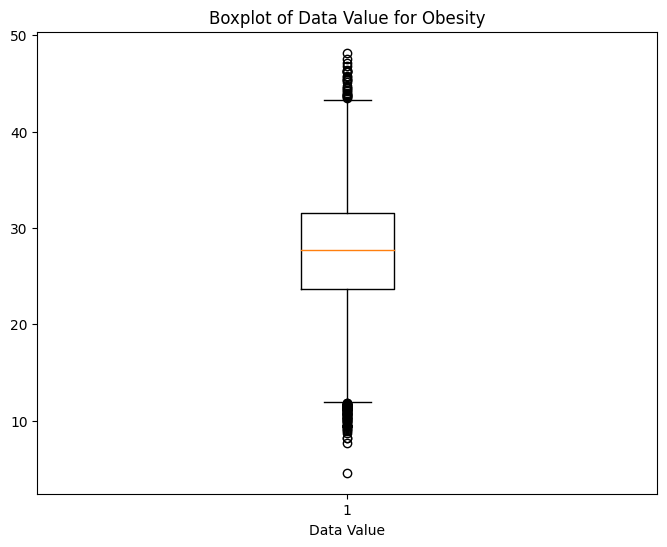

In [ ]:
import matplotlib.pyplot as plt

# Subset the DataFrame for 'variable' column equal to 'obesity'
obesity_df = stats_df_final_selected[stats_df_final_selected['variable'] == 'obesity']

# Create a boxplot to find outliers in the 'data_value' column
plt.figure(figsize=(8, 6))
plt.boxplot(obesity_df['data_value'])
plt.xlabel('Data Value')
plt.title('Boxplot of Data Value for Obesity')
plt.show()

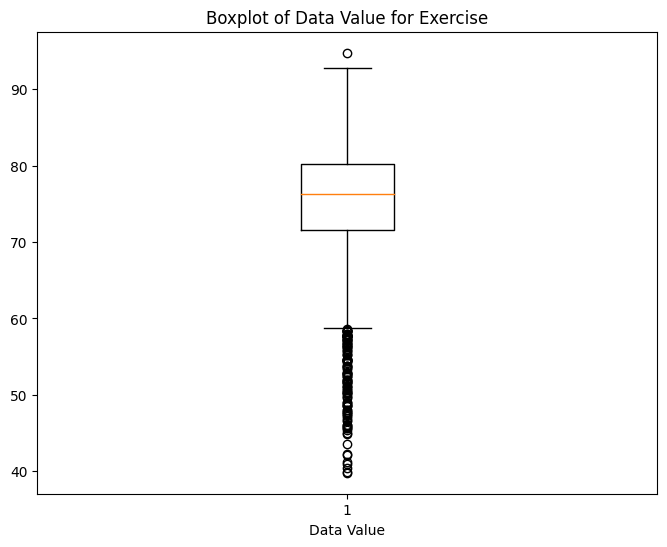

In [ ]:
import matplotlib.pyplot as plt

# Subset the DataFrame for 'variable' column equal to 'obesity'
exercise_df = stats_df_final_selected[stats_df_final_selected['variable'] == 'exercise']

# Create a boxplot to find outliers in the 'data_value' column
plt.figure(figsize=(8, 6))
plt.boxplot(exercise_df['data_value'])
plt.xlabel('Data Value')
plt.title('Boxplot of Data Value for Exercise')
plt.show()

##Verify

Finally, let's verify that our dataset looks workable now and that all the changes had their intended effects.



In [ ]:
final_df.sample(50)  # Get 50 random entries

,geoName,year,aerobic exercise,best workout,bodybuilding,diet,dietary,ejercicios,exercise,exercises,...,obesity,pizza delivery,polyphagia,prediabetes,sclerosis,signs of diabetes,symptoms of congestive heart failure,symptoms of diabetes,symptoms of high blood sugar,type 2 diabetes
39,Rhode Island,2010,37,79,73,69,85,2,88,86,...,59,85,0,21,60,53,0,49,0,61
31,New Mexico,2011,83,60,65,79,77,54,90,92,...,65,50,26,51,81,63,0,67,0,77
29,New Hampshire,2014,87,82,52,89,69,14,92,96,...,82,53,0,67,76,69,0,65,0,76
0,Alabama,2005,40,55,64,97,51,19,77,79,...,56,54,0,0,74,41,73,48,0,50
42,Tennessee,2015,49,93,60,91,65,16,86,86,...,68,64,91,74,86,88,55,85,85,72
28,Nevada,2013,44,74,80,80,47,11,74,66,...,59,94,51,24,68,62,0,68,38,60
11,Hawaii,2013,51,82,100,81,62,2,91,87,...,91,64,0,29,56,46,0,67,0,92
28,Nevada,2009,19,63,85,82,49,3,73,72,...,51,93,40,23,58,27,0,45,33,69
26,Montana,2004,0,100,50,81,59,0,100,95,...,98,43,0,0,99,77,0,59,0,72
40,South Carolina,2018,44,71,60,84,69,21,85,79,...,66,86,73,66,84,71,0,63,69,84


In [ ]:
stats_df_final_selected.sample(50)  # Get 50 random entries

,id,year,locationabbr,locationdesc,data_value,low_confidence_limit,high_confidence_limit,sample_size,stratification,stratificationtype,variable
11841,861282,2004,VT,Vermont,67.8,65.3,70.3,1038.0,65+,Age Group,exercise
9496,2372932,2014,NE,Nebraska,85.1,82.3,87.9,1053.0,18-24,Age Group,exercise
5390,2830845,2016,NM,New Mexico,83.0,81.0,84.9,2080.0,Male,Gender,exercise
66,291923,2008,HI,Hawaii,15.6,10.8,20.4,49.0,18-24,Age Group,obesity
12525,1918111,2011,PR,Puerto Rico,39.8,37.3,42.3,855.0,65+,Age Group,exercise
7502,2707038,2016,AZ,Arizona,29.0,27.5,30.5,2731.0,Overall,Overall,obesity
14119,848555,2004,PR,Puerto Rico,24.0,21.9,26.1,608.0,Female,Gender,obesity
8784,3221453,2018,IN,Indiana,76.8,73.3,80.2,565.0,35-44,Age Group,exercise
12181,127580,2010,WI,Wisconsin,78.8,75.9,81.7,792.0,45-54,Age Group,exercise
4780,764542,2005,WY,Wyoming,28.0,24.6,31.4,218.0,55-64,Age Group,obesity


#Write the Data



Finally, we write the data for future use. In our case, we will save the cleaned dataframes as csv files in a folder called cleaned_data

In [ ]:
# The 'output_directory' variable is defined to store the path of the directory where the cleaned data will be saved.
# This makes it easier to change the output directory in the future, as we only need to change this variable.
output_directory = "cleaned_data/"

# The 'to_csv' function is used to write the DataFrame 'final_df' to a CSV file.
# The path of the CSV file is constructed by concatenating 'input_directory', 'output_directory', and the filename "spatial_trends1.csv".
# The 'index=False' argument is used to prevent pandas from writing row indices to the CSV file.
final_df.to_csv(input_directory+output_directory+"spatial_trends.csv", index=False)
stats_df_final_selected.to_csv(input_directory+output_directory+"health_stats.csv", index=False)
